# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.1.3'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Indexing by datetime

In [9]:
release_dates = release_dates.set_index(['date'])

In [10]:
movies['year'] = pd.to_datetime(movies['year'], format="%Y")
movies = movies.set_index(['year'])

In [11]:
cast['year'] = pd.to_datetime(cast['year'], format="%Y")
cast = cast.set_index(['year'])

# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [12]:
len(movies)

244914

### List all Batman movies ever made

In [13]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title
year,
1943-01-01,Batman
1989-01-01,Batman


### List all Batman movies ever made - the right approach

In [14]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title
year,
2016-01-01,Batman: Anarchy
1995-01-01,Batman Forever
2010-01-01,Batman Untold
2018-01-01,Scooby-Doo & Batman: the Brave and the Bold
2018-01-01,Batman the Rise of Red Hood
2016-01-01,Batman: Return of the Caped Crusaders
1997-01-01,Batman & Robin
2012-01-01,Batman Revealed
1943-01-01,Batman


### Display the top 15 Batman movies in the order they were released

In [15]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title
year,
1943-01-01,Batman
1949-01-01,Batman and Robin
1964-01-01,Batman Dracula
1965-01-01,Alyas Batman at Robin
1966-01-01,James Batman
1966-01-01,Batman: The Movie
1967-01-01,Batman Fights Dracula
1973-01-01,"Fight! Batman, Fight!"
1989-01-01,Batman


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [16]:
harry_df = movies[movies.title.str.contains('Harry Potter', case=False)]
harry_df.sort_values(by=['year'], ascending=False)

,title
year,
2011-01-01,Harry Potter and the Deathly Hallows: Part 2
2010-01-01,Harry Potter and the Deathly Hallows: Part 1
2009-01-01,Harry Potter and the Half-Blood Prince
2007-01-01,Harry Potter and the Order of the Phoenix
2005-01-01,Harry Potter and the Goblet of Fire
2004-01-01,Harry Potter and the Prisoner of Azkaban
2002-01-01,Harry Potter and the Chamber of Secrets
2001-01-01,Harry Potter and the Sorcerer's Stone


### How many movies were made in the year 2017?

In [17]:
len(movies.loc['2017'])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [18]:
len(movies.loc['2015'])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [19]:
len(movies.loc['2000':'2018'])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [20]:
hamlet_df = movies[movies.title.str.contains('Hamlet', case=False)]
len(hamlet_df)

57

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [21]:
hamlet_df.loc['2000':'2200'].sort_values(by=['year'], ascending=False)

,title
year,
2018-01-01,Hamlet: The Fall of a Sparrow
2017-01-01,Hamlet
2017-01-01,Hamlet in the Golden Vale
2017-01-01,Hamlet/Horatio
2017-01-01,Hamlet (II)
2016-01-01,Royal Shakespeare Company: Hamlet
2016-01-01,Hamlet
2015-01-01,Hamlet
2015-01-01,National Theatre Live: Hamlet


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [22]:
len(cast.loc[(cast.title == 'Inception') &
             (cast.n.isna())] )

27

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [23]:
len(cast.loc[(cast.title == 'Inception') &
             (cast.n.isna() == False)] )

51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [24]:
cast.loc[(cast.title == 'Inception') &
             (cast.n.isna() == False)].sort_values('n')[['name','n']].iloc[0:10]

,name,n
year,,
2010-01-01,Leonardo DiCaprio,1.0
2010-01-01,Joseph Gordon-Levitt,2.0
2010-01-01,Ellen Page,3.0
2010-01-01,Tom Hardy,4.0
2010-01-01,Ken Watanabe,5.0
2010-01-01,Dileep Rao,6.0
2010-01-01,Cillian Murphy,7.0
2010-01-01,Tom Berenger,8.0
2010-01-01,Marion Cotillard,9.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [25]:
cast.loc[cast.character == 'Albus Dumbledore'].title.unique()

array(['Epic Movie', 'Harry Potter and the Goblet of Fire',
       'Harry Potter and the Order of the Phoenix',
       'Harry Potter and the Prisoner of Azkaban',
       'Harry Potter and the Chamber of Secrets',
       "Harry Potter and the Sorcerer's Stone", 'Ultimate Hero Project',
       'Potter'], dtype=object)

In [26]:
cast.loc[cast.character == 'Albus Dumbledore'].name.unique()

array(['Dane Farwell', 'Michael Gambon', 'Richard Harris',
       "George (X) O'Connor", 'Timothy Tedmanson'], dtype=object)

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [27]:
len(cast.loc[cast.name == 'Keanu Reeves'].character.unique())

56

In [37]:
cast.loc[(cast.name == 'Keanu Reeves') &
         (cast.n.isna() == False),'character'].loc['1999':'2200'].sort_index()

year
1999-01-01                 Himself
1999-01-01                 Dogstar
1999-01-01                     Neo
2000-01-01                 Griffin
2000-01-01             Shane Falco
2000-01-01        Donnie Barksdale
2001-01-01             Nelson Moss
2001-01-01           Conor O'Neill
2003-01-01           Julian Mercer
2003-01-01                     Neo
2003-01-01                     Neo
2005-01-01                 Dogstar
2005-01-01        John Constantine
2005-01-01             Perry Lyman
2006-01-01              Alex Wyler
2006-01-01              Bob Arctor
2008-01-01    Detective Tom Ludlow
2008-01-01                  Klaatu
2009-01-01            Chris Nadeau
2010-01-01             Henry Torne
2013-01-01                     Kai
2013-01-01             Donaka Mark
2014-01-01               John Wick
2015-01-01                    Evan
2016-01-01                   Keanu
2016-01-01                    Hank
2016-01-01        Detective Galban
2016-01-01                  Ramsey
2016-01-01     

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [40]:
len(cast.loc['1950':'1960'])

234635

In [41]:
len(cast.loc['2007':'2017'])

1452413

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present

In [42]:
len(cast.loc['2000':'2200'])

1949762

In [49]:
len(cast.loc[cast.n.isna()].loc['2000':'2200'] )

887484

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [50]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Temptation              12
The Outsider            12
Maya                    12
Othello                 11
The Three Musketeers    11
Honeymoon               11
Freedom                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

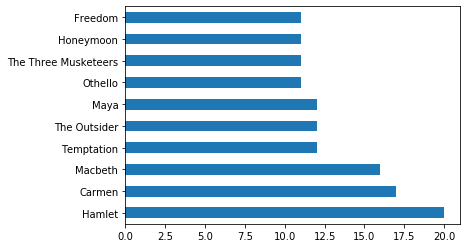

In [51]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [66]:
movies.index.year.value_counts()[:3]

2017    11474
2016     9440
2015     8702
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

In [68]:
movies.resample('10AS').count().sort_index()

,title
year,
1894-01-01,9
1904-01-01,472
1914-01-01,10173
1924-01-01,8868
1934-01-01,10390
1944-01-01,9716
1954-01-01,14674
1964-01-01,19909
1974-01-01,19067


### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [86]:
cast.groupby('character').count().n.sort_values(ascending=False).iloc[0:10]

character
Himself      7806
Dancer       5635
Extra        4299
Doctor       3991
Nurse        3327
Policeman    3254
Bartender    2889
Reporter     2722
Herself      2654
Waitress     2312
Name: n, dtype: int64

In [91]:
cast.loc[cast.character == 'Herself'].groupby('name').count().n.sort_values(ascending=False).iloc[0:10]

name
Joyce Brothers               9
Luisa Horga                  9
Mar?a Luisa (V) Mart?n       9
Mar?a Isabel (III) Mart?n    6
In?s J. Southern             6
Sally Jessy Raphael          5
Marina Revilla               5
Aleiska von Lippke           5
Estrella Borja               5
?ngela Silv?n                5
Name: n, dtype: int64

In [92]:
cast.loc[cast.character == 'Himself'].groupby('name').count().n.sort_values(ascending=False).iloc[0:10]

name
Ron Jeremy                   17
Manuel Valent?n-Fdez.         9
Shaquille O'Neal              8
Diego Aramburu-Zabala         8
Miguel Cuesta                 7
Manuel Jos? Valent?n-Fdez     7
Abraham Torres                7
Cayetano Guerra               7
Alex Trebek                   6
Maxime Callico                6
Name: n, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [95]:
cast.loc[cast.character.str.contains('Zombie', case=False)].groupby('character').count().n.sort_values(ascending=False).iloc[0:10]

character
Zombie                             2068
Dock Zombie                          69
Castle Zombie                        60
Zathera's Zombie                     28
Featured Zombie                      25
Zombie #1                            19
Background Zombie                    19
Featured Party Zombie                16
Soldiers and Zombies                 16
Zombie (segment "Lost Command")      16
Name: n, dtype: int64

In [96]:
cast.loc[cast.character.str.contains('Police', case=False)].groupby('character').count().n.sort_values(ascending=False).iloc[0:10]

character
Policeman              3254
Police Officer         1777
Police Inspector        425
Police Sergeant         304
Police                  275
Policewoman             272
Police Chief            247
Police Commissioner     219
Policeman #2            206
Policeman #1            205
Name: n, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

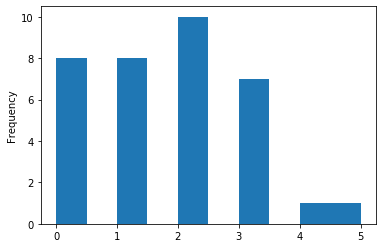

In [107]:
cast.loc[cast.name == 'Keanu Reeves'].resample('Y').count().sort_index().n.plot(kind = 'hist', x = cast.index.year)

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


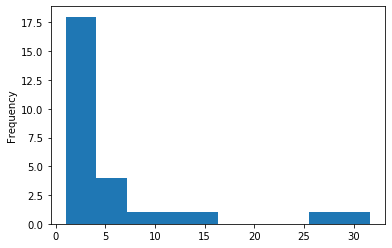

In [109]:
cast.loc[cast.name == 'Keanu Reeves'].resample('Y').mean().sort_index().n.plot(kind = 'hist', x = cast.index.year)

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

In [110]:
movies[movies.title.str.contains('Hamlet', case=False)].resample('10AS').count().sort_index()

,title
year,
1910-01-01,4
1920-01-01,2
1930-01-01,1
1940-01-01,1
1950-01-01,1
1960-01-01,3
1970-01-01,4
1980-01-01,3
1990-01-01,6


### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [116]:
len(cast.loc[cast.n == 1].loc['1960':'1969'])

11823

In [117]:
len(cast.loc[cast.n == 1].loc['2000':'2009'])

26344

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [133]:
multi_role = cast.loc[cast.name == 'Frank Oz'].sort_index().groupby('title').sum()
multi_role.loc[multi_role.n > 1]

,n
title,
An American Werewolf in London,26.0
Blues Brothers 2000,4.0
Follow That Bird,9.0
Innocent Blood,21.0
Inside Out,14.0
Labyrinth,17.0
"Monsters, Inc.",9.0
Muppet Treasure Island,56.0
Muppets from Space,28.0


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [134]:
multi_role = cast.loc[cast.name == 'Frank Oz'].sort_index().groupby('character').sum()
multi_role.loc[multi_role.n > 1]

,n
character,
Animal,32.0
"Aughra, a Keeper Of Secrets (performer)",3.0
Bert,21.0
Chamberlain (performer),3.0
Cookie Monster,41.0
Corrections Officer,21.0
Corrupt Cop,46.0
Doc Hopper's Men,2.0
Fozzie,2.0


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

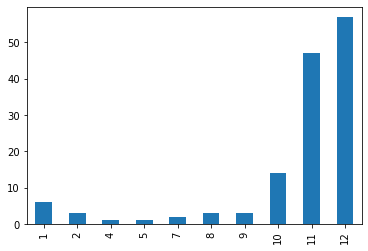

In [142]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.index.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

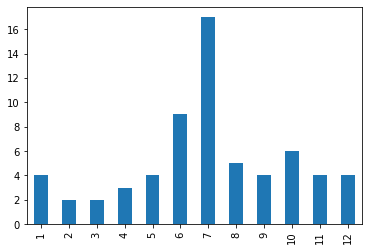

In [143]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.index.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

<ipython-input-144-62fe152295b3>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  Action.index.week.value_counts().sort_index().plot(kind='bar')


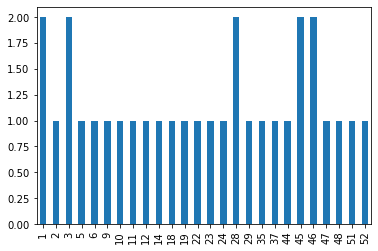

In [144]:
Action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
Action.index.week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [218]:
us_release = release_dates.loc[release_dates.country == 'USA']
us_release['date'] = us_release.index

merged = us_release.merge(cast, on = 'title', how = 'left')
merged['date'] = pd.to_datetime(merged['date'])
merged = merged.set_index('date')

<ipython-input-218-37f64874ad01>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_release['date'] = us_release.index


In [222]:
KR = merged.loc[(merged.name == 'Keanu Reeves') &
                (merged.n == 1)].sort_index()

### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

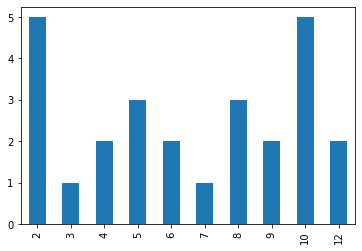

In [223]:
KR.index.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

In [224]:
IMK = merged.loc[(merged.name == 'Ian McKellen') &
                 (merged.n == 1)].sort_index()

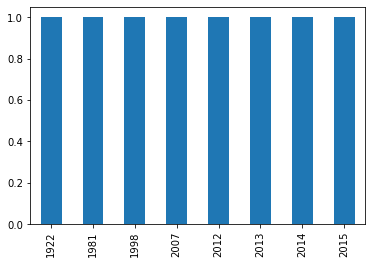

In [227]:
IMK.index.year.value_counts().sort_index().plot(kind='bar')